This notebook contains the following:

1) importing libraries and dataset.

2) preparing data for analysis - limiting and plotting data.

3) reshaping data in arrays.

4) preparing and testing a model of regression.

5) contrasting actual and testing data.

6) writing down conclusions about this model.


Importing libraries for analysis

In [2]:
# Importing Analitycal and Visual libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

Establishing a path and importing the dataframe

In [4]:
path = r'C:\Users\Paola\Desktop\Shaul\Data\CF\Data Immersion\Achievement 6\Uber October-2023 Basket Analysis'

In [5]:
path

'C:\\Users\\Paola\\Desktop\\Shaul\\Data\\CF\\Data Immersion\\Achievement 6\\Uber October-2023 Basket Analysis'

In [6]:
df = pd.read_csv(os.path.join(path, '2-Data', 'Prepared Data', 'uber_limited_to_usd50_trips.csv'), index_col = False)

C:\Users\Paola\AppData\Local\Temp\ipykernel_1584\2243294812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'], bins=25) # Shows extreme values


<Axes: xlabel='fare_amount', ylabel='Density'>

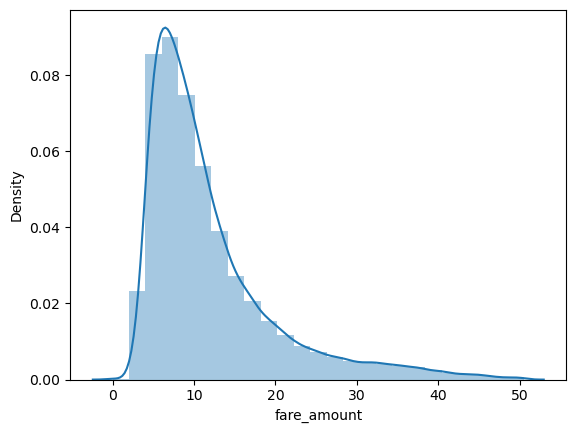

In [7]:
# Checking  for outliers
sns.distplot(df['fare_amount'], bins=25) # Shows extreme values

The inital hypothesis is that the length of the trip affects the costs. From previous exercises it seems this is not entirely the case. However, it is better to check it with linear regression. 

The histogram shows that the data is greatly skewed to the right. For the sake of the analysis, I will limit the trip costs to $20 dollars.


In [8]:
# There are 2921 trips that exceed $50 dollars. From those, 64 that exceed $100 dollars. 
# From the latter, 26 that exceed $150 dollars. Lastly, from those 10 exceed $200 dollars. 
# Only four trips exceed $300 dollars. I am limiting the visual analysis to trip costing up to $50.
df1 = df.loc[df['fare_amount'] < 21]

In [9]:
# Getting some statistics
df1['fare_amount'].mean() # Check the mean

9.543814744892938

In [10]:
df1['fare_amount'].median() # Check the median

8.5

In [11]:
df1['fare_amount'].max() # Check the max

20.5

Preparing data for regression analysis - initial hypothesis

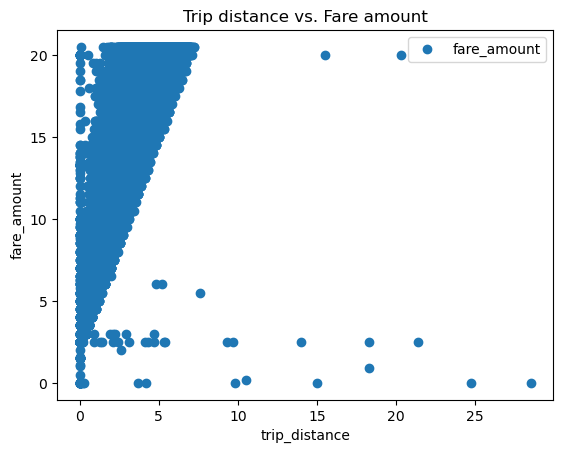

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df1.plot(x = 'trip_distance', y='fare_amount',style='o') 
plt.title('Trip distance vs. Fare amount')  
plt.xlabel('trip_distance')  
plt.ylabel('fare_amount')  
plt.show()
# Visualisation saved using right click, to visualisation folder.

There is a clear trend of positive correlation: the longer the trip, the higher the price. This seems to support the hypothesis stated above.

However, there are many entries with considerably longer trips which are located in the lower end of the fare variable. This is something worth checking.

Reshaping the data for regression analysis

In [13]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df1['trip_distance'].values.reshape(-1,1)
y = df1['fare_amount'].values.reshape(-1,1)

In [14]:
# Checking the arrays
X

array([[2.5 ],
       [2.9 ],
       [6.2 ],
       ...,
       [3.4 ],
       [0.92],
       [1.  ]])

In [15]:
y

array([[ 9. ],
       [11. ],
       [20.5],
       ...,
       [14. ],
       [ 5.5],
       [ 6. ]])

In [16]:
# Spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Checking the X_train array
X_train

array([[5.41],
       [3.63],
       [2.55],
       ...,
       [0.78],
       [0.53],
       [5.72]])

Preparing the model for regression

In [19]:
# Creating a regression object.

reg = LinearRegression()

In [20]:
# Fitting the regression object onto the training set.

reg.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the values of y using X.

y_pred = reg.predict(X_test)

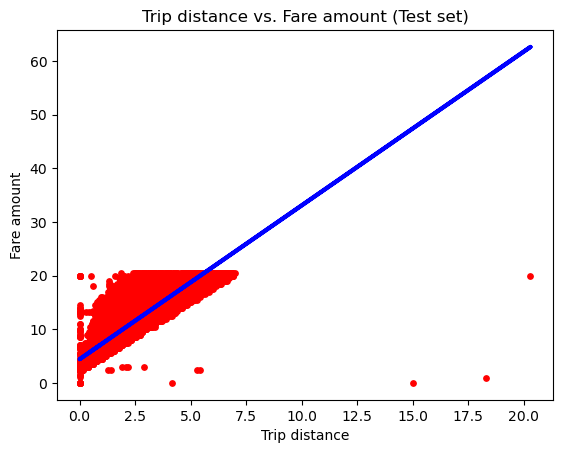

In [23]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='red', s = 15)
plot_test.plot(X_test, y_pred, color='blue', linewidth =3)
plot_test.title('Trip distance vs. Fare amount (Test set)')
plot_test.xlabel('Trip distance')
plot_test.ylabel('Fare amount')
plot_test.show()
# Saving graph with right click.

Most data points fit closely to the line trend.

However, there are a few points far from the line so I am going to check the summary statistics.

In [24]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) # This is the mean squared error
r2 = r2_score(y_test, y_pred) # This is the R2 score. 

In [26]:
# Printing the model summary statistics.

print('Slope:' ,reg.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.86841287]]
Mean squared error:  4.773191695879114
R2 score:  0.7278566859802181


Observations:

1) The slope indicates a positive correlation between the data points. Most of them are fairly close to the line.

2) The MSE is very small for a data set with over 97000 entries. It indicates this model makes it a good fit for regression.

3) The R2 score is 0.72 (or close to 72% of accuracy). In one hand, it is a good model. However, it also has an almost 30% possibility of inaccuracy. Therefore, it is not the best model to be used for regression.

So far, it seems that trip distances play a very important role in determining a trip's fare, but it is definitely not the only factor, and it is not a fully causal relationship: we have seen longer trips with a fairly cheaper fare.

Contrasting the actual and the test data

In [30]:
# Creating a dataframe comparing the actual and predicted values of y (the trip's fare).

data = pd.DataFrame({'Actual fare': y_test.flatten(), 'Predicted fare': y_pred.flatten()})
data.head(25)

,Actual fare,Predicted fare
0,4.5,5.704459
1,6.0,6.765772
2,10.0,9.834974
3,15.5,10.035763
4,18.0,15.858641
5,11.5,7.913137
6,11.0,7.310771
7,6.5,7.855769
8,5.0,6.794456
9,7.5,9.347344


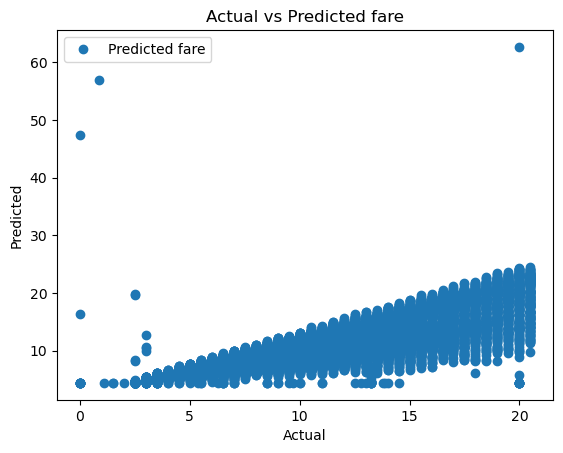

In [32]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'Actual fare', y='Predicted fare',style='o')
plt.title('Actual vs Predicted fare')  
plt.xlabel('Actual')  
plt.ylabel('Predicted')  
plt.show()

It can be inferred that the model works accurately, but - as previously stated - its range of inaccuracy is too high to be relied upon. This confirms my conclusions when analysing the MSE and the R2 score.

As stated in the previous notebooks, my 'updated' hypothesis would be that time (unsociable hours or weekends) would also play a role in the final price to pay.
However, to completely test it, I would have to contrast both time and distance to get an accurate answer.

Finally, I would contrast this between all boroughs to see if the pattern remains.

Bias: I consider there is - if at all - little risk of bias in this model test and hypothesis. Both referring to the data collection, and to the actual testing (since it is following the same logical reasoning expounded in the previous notebooks).